### Loading the datasets

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime as dt


l = pd.read_csv("loan.csv")
c=pd.read_excel("Data_Dictionary.xlsx")
l

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

## There are multiple columns with no inputs. Hence dropping all such columns

In [2]:
#Dropping the columns with no inputs
l=l.dropna(axis=1, how='all')
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### Taking a look at definitions of columns

In [3]:
c["LoanStatNew"] = c["LoanStatNew"].apply(lambda stat : str(stat))
desc = c[c["LoanStatNew"].apply(lambda stat: stat in list(l.columns))]
display(HTML(desc.to_html()))

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
15,desc,Loan description provided by the borrower


## Taking a look at missing values in each column

In [4]:
percentage_of_missingvalues = l.isnull().sum().sort_values()*100/l.shape[0]
percentage_of_missingvalues.sort_values(ascending=False).head(15)


next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_acc                      0.000000
dtype: float64

__"Since there are two columns with more than 90% missing values dropping them."__

In [5]:
l.drop(labels=["next_pymnt_d","mths_since_last_record"], inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

__Since we are to look at the loan status with either Fully_Paid or Charged_off, we can choose to drop the rows with Loan status Current__

In [7]:
l=l[l["loan_status"]!="Current"]

## Formatting the Columns

### Dropping the columns with no significant impact on analysis
#### "last_pymnt_d" - Just information - no impact on loan repayment
#### "initial_list_status","pymnt_plan" - all entries are same - no meaningful information, hence dropping the columns
#### "revol_util", - Customer behaviour variables, not available during the time of application
#### "title","desc","url","emp_title" - Desciptive variables, hence no impact on analysis
#### "last_credit_pull_d" - No significance

In [8]:
labels_to_drop=["last_credit_pull_d","last_pymnt_d","initial_list_status","revol_util","title","desc","url","pymnt_plan","emp_title"]
l.drop(labels=labels_to_drop, axis=1, inplace=True)

__Converting int_rate from string to float value__

In [9]:
l["int_rate"] = l["int_rate"].apply(lambda rate: float(rate.strip("%")))


### Working with columns with float values
#### 'tax_liens' - Has only one available input hence dropping the same as it doesnot add much information to the analysis
#### Dropping the columns that are behavioural variables, that wouldn't be available at the time of loan application

In [10]:
float_columns_to_drop = ['mths_since_last_delinq', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens']
l.drop(labels=float_columns_to_drop, axis=1, inplace=True)



### Working with columns with int values
#### 'application_type' - Has only one available input hence dropping the same as it doesnot add much information to the analysis
#### Dropping the columns that are behavioural variables, that wouldn't be available at the time of loan application
#### 'funded_amnt' - droppping as the funded_amnt_inv has more significance over the analysis, and is highly corelated to the same
#### 'id','member_id' - Dropping decriptive variables

In [11]:
int_columns_to_drop =  ["id", "member_id","delinq_amnt","delinq_2yrs","funded_amnt","revol_bal","policy_code","acc_now_delinq","application_type"]
l.drop(labels=int_columns_to_drop, axis=1, inplace=True)



In [12]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
loan_amnt               38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
issue_d                 38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
zip_code                38577 non-null object
addr_state              38577 non-null object
dti                     38577 non-null float64
earliest_cr_line        38577 non-null object
inq_last_6mths          38577 non-null int64
open_acc      

__Formatting the column issue_d__

In [13]:
l["issue_d"] = l["issue_d"].apply(lambda s : dt.datetime.strptime(s, "%b-%y"))

__Since loan_status column has only 2 values, giving the ordinal value of 0 for status as Fully_Paid and 1 for status as Charged Off__

In [14]:
l["loan_status_value"] = l["loan_status"].apply(lambda s: 0 if s=='Fully Paid' else 1)
l.drop(labels=["loan_status"], axis=1, inplace=True)

__Formatting the column earliest_cr_line__

In [15]:
l["earliest_cr_line"] = l["earliest_cr_line"].apply(lambda s : dt.datetime.strptime(s, "%b-%y"))


# IMPUTING the missing values

__Taking a look at columns with missing values__

In [16]:
l_missing = l.isnull().sum().sort_values()*100/l.shape[0]
l_missing.sort_values(ascending=False)

 

emp_length              2.677761
pub_rec_bankruptcies    1.806776
issue_d                 0.000000
total_acc               0.000000
pub_rec                 0.000000
open_acc                0.000000
inq_last_6mths          0.000000
earliest_cr_line        0.000000
dti                     0.000000
addr_state              0.000000
zip_code                0.000000
purpose                 0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
verification_status     0.000000
loan_status_value       0.000000
loan_amnt               0.000000
dtype: float64

__Setting the missing values of pub_rec_bankruptcies to median value__

In [17]:
l["pub_rec_bankruptcies"].fillna(value=l.describe()["pub_rec_bankruptcies"]["50%"], inplace=True)

In [18]:
l["pub_rec_bankruptcies"].isna().sum()

0


__Converting the employee length to integer ordinal categorical variable__
<br/>
__Values associated with experience are as follows: For experience e (e<1 year, 0), (e>=1,e), (>=10 years, 10)__

In [19]:
def convertToNum( s):
    if s is np.nan:
        return np.nan;
    split = (str(s)).split()
    if split[0]=="<":
        return 0;
    elif split[0]=="10+":
        return 10;
    else : 
        return int(split[0]);
    
    
        
l["emp_length"] = l["emp_length"].apply(lambda s: convertToNum(s))

l["emp_length"].fillna(value=float(l["emp_length"].mode()), inplace=True)
l.emp_length.isna().sum()

0

In [20]:
l.isna().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
loan_status_value       0
dtype: int64

<font color = Purple>
<h1>Univariate analysis</h1>

In [21]:
l.describe()


,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,loan_status_value
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10222.481123,11.932219,322.466318,5.076445,6.877797e+04,13.272727,0.871737,9.275423,0.055422,22.052648,0.042694,0.145864
std,7348.441646,7022.720644,3.691327,208.639215,3.602917,6.421868e+04,6.673044,1.071546,4.401588,0.237804,11.425861,0.202809,0.352975
min,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
25%,5300.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000
50%,9600.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000
75%,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000
max,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,2.000000,1.000000


In [22]:
l.describe()["loan_status_value"]



count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status_value, dtype: float64

# 14.5%  of people on average default

In [23]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
loan_amnt               38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_length              38577 non-null float64
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
issue_d                 38577 non-null datetime64[ns]
purpose                 38577 non-null object
zip_code                38577 non-null object
addr_state              38577 non-null object
dti                     38577 non-null float64
earliest_cr_line        38577 non-null datetime64[ns]
inq_last_6mths          38577 non-null int64
open_acc                38577 non-null int6

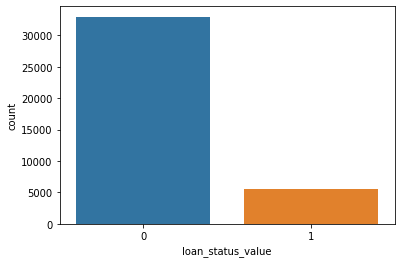

In [24]:
sns.countplot(x="loan_status_value", data=l)
plt.show()

<font color = Purple>
<h1>SEGMENTED UNIVARIATE ANALYSIS</h1>

In [25]:
impact = {}

## Taking a look at correlation matrix,
#### We can see that funded_amnt_inv and loan_amnt are positively correlated, analysis on any one of them should give us enough information
##### Same is the case with pub_rec and pub_rec_bankruptcies	
##### Same is the case with loan_amnt and installment	


In [26]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = l.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,loan_status_value
loan_amnt,1,0.937922,0.301265,0.93226,0.129729,0.268999,0.0624358,0.01294,0.1772,-0.0499975,0.256179,-0.0351408,0.0594626
funded_amnt_inv,0.937922,1,0.297473,0.905464,0.142601,0.251981,0.070663,-0.00280027,0.162738,-0.0514702,0.242715,-0.036327,0.037781
int_rate,0.301265,0.297473,1,0.277203,-0.0111393,0.0488991,0.110913,0.133362,0.00602205,0.0986354,-0.046539,0.0840158,0.21139
installment,0.93226,0.905464,0.277203,1,0.103062,0.267842,0.0520385,0.0110144,0.172893,-0.0457055,0.22986,-0.0330383,0.0271529
emp_length,0.129729,0.142601,-0.0111393,0.103062,1,0.0938632,0.0458621,0.00826729,0.0856525,0.0704525,0.195704,0.0708502,0.0233771
annual_inc,0.268999,0.251981,0.0488991,0.267842,0.0938632,1,-0.12153,0.0354651,0.156927,-0.017864,0.234534,-0.0159546,-0.0408672
dti,0.0624358,0.070663,0.110913,0.0520385,0.0458621,-0.12153,1,0.00217837,0.287849,-0.00474244,0.229119,0.00731548,0.0450777
inq_last_6mths,0.01294,-0.00280027,0.133362,0.0110144,0.00826729,0.0354651,0.00217837,1,0.0934343,0.0237263,0.113516,0.014821,0.0718778
open_acc,0.1772,0.162738,0.00602205,0.172893,0.0856525,0.156927,0.287849,0.0934343,1,2.83629e-05,0.68726,0.00561557,-0.00914023
pub_rec,-0.0499975,-0.0514702,0.0986354,-0.0457055,0.0704525,-0.017864,-0.00474244,0.0237263,2.83629e-05,1,-0.0234942,0.841571,0.051001


In [27]:
l.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'pub_rec_bankruptcies', 'loan_status_value'],
      dtype='object')

#### Analysis with respect to Purpose

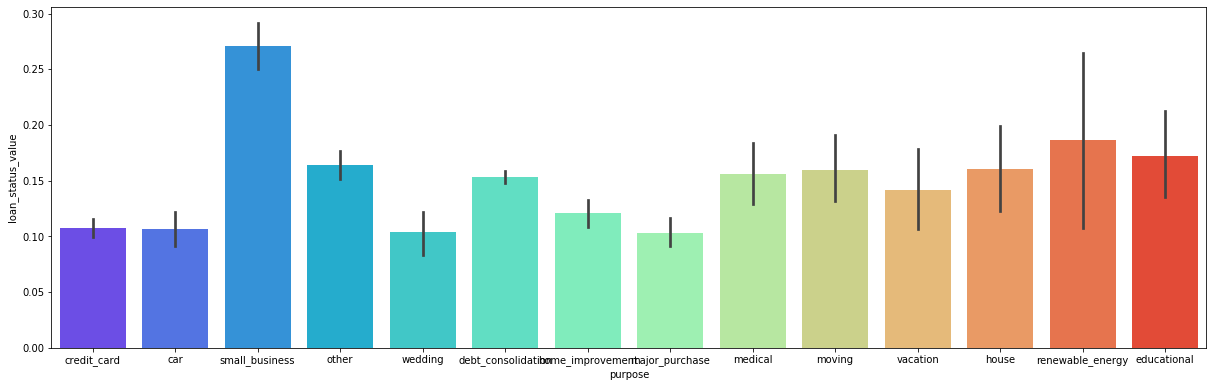

0.16755376415369522


In [28]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

#purpose plot
gb_purpose = l.groupby("purpose", as_index=False).mean()

sns.barplot(ax=ax, x='purpose',y='loan_status_value',data=l,palette='rainbow')
plt.show()
# small_business has impact
gb_purpose_range = gb_purpose["loan_status_value"].max()-gb_purpose["loan_status_value"].min()
print(gb_purpose_range)
impact["gb_purpose_range"] = gb_purpose_range

Result is that the small_business and renewable_energy tend to show high rate of defaulting the loan

#### Analysis with respect to loan_amnt

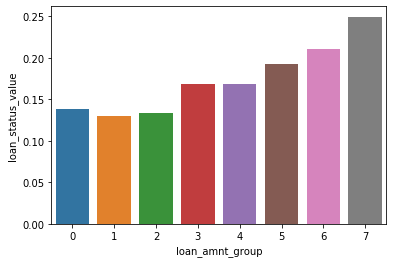

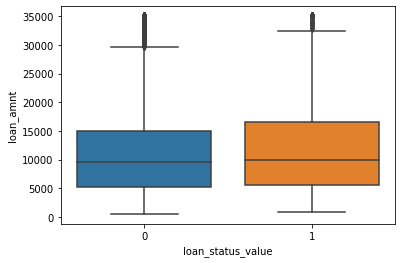

0.1192288149094603


In [29]:
l["loan_amnt"].describe()
l["loan_amnt_group"] = l["loan_amnt"]//5000

gb_loan_amnt_group = l.groupby("loan_amnt_group", as_index=False).mean()
ax=sns.barplot(x="loan_amnt_group",  y="loan_status_value",data=gb_loan_amnt_group)
plt.show()


sns.boxplot( x="loan_status_value", y="loan_amnt", data=l)
plt.show()
gb_loan_amnt_group_range = gb_loan_amnt_group["loan_status_value"].max()-gb_loan_amnt_group["loan_status_value"].min()
print(gb_loan_amnt_group_range)
impact["gb_loan_amnt_group_range"] = gb_loan_amnt_group_range


The loan amount as requested by the applicant is binned into intervals of 5000 units.<br/>
Higher the bin number, higher is the loan_amount.<br/> 
The results show that the average rate of loan default increases as the loan_amount increases.<br/>
From the box plot, we see at higher loan amount in the 3rd and 4th quartiles in case of default<br/>
__Hence loan_amount is a driver__<br/>


### Analysis with respect to funded_amnt_inv
#### the loan amount as funded by the investors is binned into intervals of 5000 units. 
#### higher the bin number, higher is the funded_amnt_inv. 

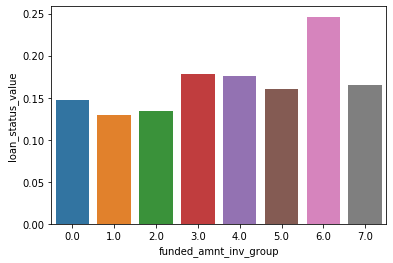

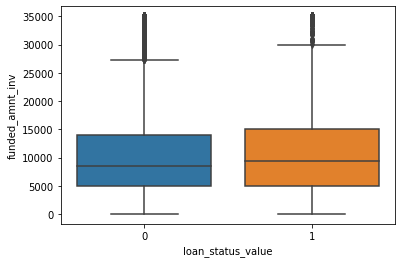

0.11626956835756905


In [30]:
l["funded_amnt_inv_group"] = l["funded_amnt_inv"]//5000

gb_funded_amnt_inv_group = l.groupby("funded_amnt_inv_group", as_index=False).mean()
ax=sns.barplot(x="funded_amnt_inv_group",  y="loan_status_value",data=gb_funded_amnt_inv_group)
plt.show()


sns.boxplot( x="loan_status_value", y="funded_amnt_inv", data=l)
plt.show()
 
    
gb_funded_amnt_inv_group_range = gb_funded_amnt_inv_group["loan_status_value"].max()-gb_funded_amnt_inv_group["loan_status_value"].min()
print(gb_funded_amnt_inv_group_range)
impact["gb_funded_amnt_inv_group_range"] = gb_funded_amnt_inv_group_range


The results show that the average rate of loan default increases as the funded_amnt_inv increases
#### hence funded_amnt_inv is a driver

### Analysis with respect to term



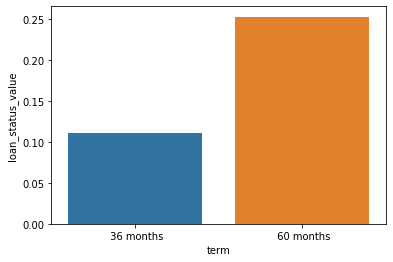

0.14222913868197734


In [31]:
gb_term = l.groupby("term", as_index=False).mean()
ax=sns.barplot(x="term",  y="loan_status_value",data=gb_term)
plt.show()

gb_term_range = gb_term["loan_status_value"].max()-gb_term["loan_status_value"].min()
print(gb_term_range)
impact["gb_term_range"] = gb_term_range

from the two available terms, the average rate of default is much higher for 60 month term, almost by 2 times
#### hence term is a driver

### Analysis with respect to int_rate



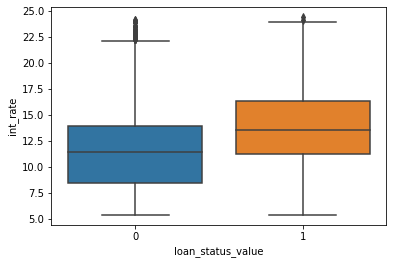

In [32]:
sns.boxplot( x="loan_status_value", y="int_rate", data=l)
plt.show()


#### The above plot shows that the higher interest rate is frequent in the cases of defaulting



### Analysis with respect to grade


##### Since grade is available from credit score and loan application details, we have decided to include grade as one of the variables for analysis
__From graph we can see that grades from E to G are at significant risk of defaulting__


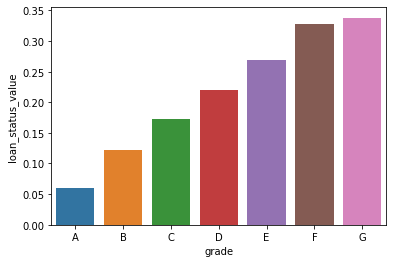

0.2778623285516181


In [33]:
gb_grade = l.groupby("grade", as_index=False).mean()
ax=sns.barplot(x="grade",  y="loan_status_value",data=gb_grade)
plt.show()

gb_grade_range = gb_grade["loan_status_value"].max()-gb_grade["loan_status_value"].min()
print(gb_grade_range)
impact["gb_grade_range"] = gb_grade_range

### Analysis with respect to sub_grade

#### Similar to the grade we can see that as we move towards the right, the trend is that the rate of default increases

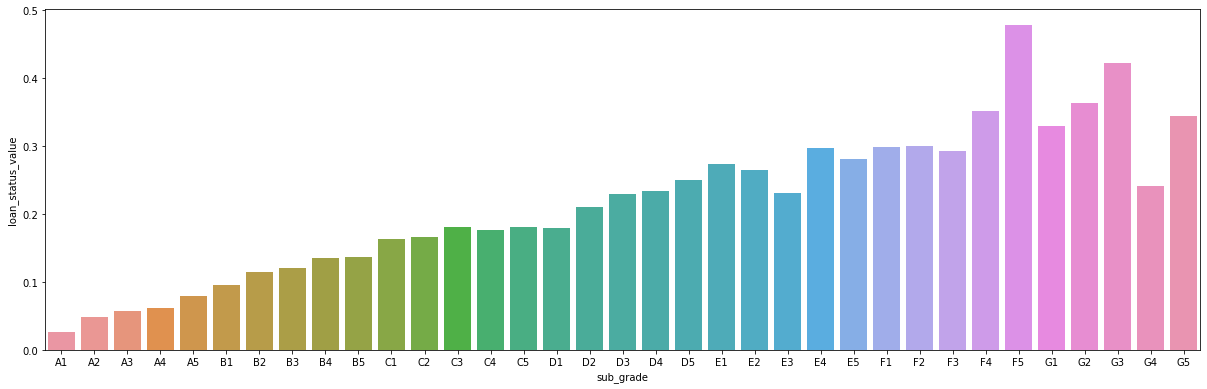

0.4515372124282285


In [34]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

gb_sub_grade = l.groupby("sub_grade", as_index=False).mean()
sns.barplot(ax=ax,x="sub_grade",  y="loan_status_value",data=gb_sub_grade)
plt.show()


gb_sub_grade_range = gb_sub_grade["loan_status_value"].max()-gb_sub_grade["loan_status_value"].min()
print(gb_sub_grade_range)
impact["gb_sub_grade_range"] = gb_sub_grade_range

### Analysis with respect to emp_length

##### Employment length of the applicant is binned as 0 for less than 1 year, 10 for 10 or more years
##### from 1-9, the bin label indicates the experience

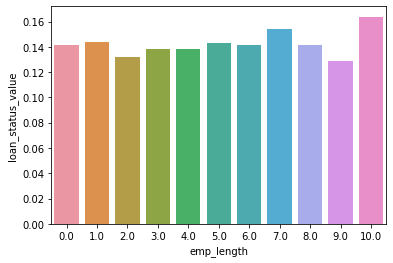

0.03486891602027492


In [35]:
gb_emp_length = l.groupby("emp_length", as_index=False).mean()
ax=sns.barplot(x="emp_length",  y="loan_status_value",data=gb_emp_length)
plt.show()

gb_emp_length_range = gb_emp_length["loan_status_value"].max()-gb_emp_length["loan_status_value"].min()
print(gb_emp_length_range)
impact["gb_emp_length_range"] = gb_emp_length_range


__we see the increase in employment lenght has no significant impact of default rate.<br/>
emp_length - is not a driving factor, or a very weak driver of default rate at best__



### Analysis with respect to home_ownership - Categorical variable



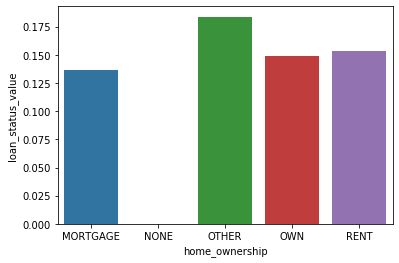

0.1836734693877551


In [36]:
gb_home_ownership = l.groupby("home_ownership", as_index=False).mean()
ax=sns.barplot(x="home_ownership",  y="loan_status_value",data=gb_home_ownership)
plt.show()

gb_home_ownership_range = gb_home_ownership["loan_status_value"].max()-gb_home_ownership["loan_status_value"].min()
print(gb_home_ownership_range)
impact["gb_home_ownership_range"] = gb_home_ownership_range


home_ownership - under other - is a slight driver of default

### Analysis with respect to verification_status - Categorical variable

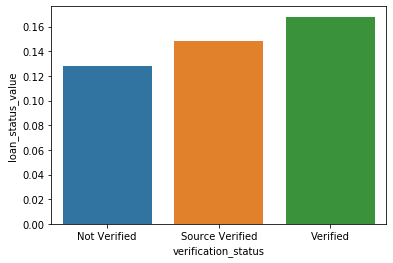

0.039722543051679354


In [37]:

gb_verification_status = l.groupby("verification_status", as_index=False).mean()
ax=sns.barplot(x="verification_status",  y="loan_status_value",data=gb_verification_status)
plt.show()


gb_verification_status_range = gb_verification_status["loan_status_value"].max()-gb_verification_status["loan_status_value"].min()
print(gb_verification_status_range)
impact["gb_verification_status_range"] = gb_verification_status_range





__As contrary to the expectation, segmented univariate analysis shows that applications which have verification status as verified tend to show higher rate of default__

### Analysis with respect to installment

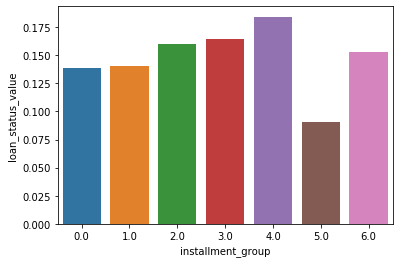

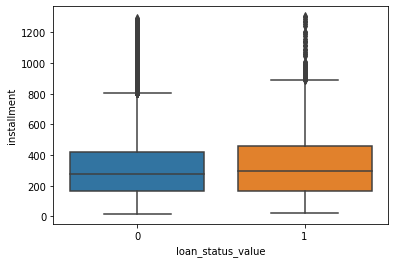

0.0932226456178552


In [38]:
l["installment_group"] = l["installment"]//200

gb_installment_group = l.groupby("installment_group", as_index=False).mean()
ax=sns.barplot(x="installment_group",  y="loan_status_value",data=gb_installment_group)
plt.show()
sns.boxplot( x="loan_status_value", y="installment", data=l)
plt.show()



gb_installment_group_range = gb_installment_group["loan_status_value"].max()-gb_installment_group["loan_status_value"].min()
print(gb_installment_group_range)
impact["gb_installment_group_range"] = gb_installment_group_range







From the box plot, about 50% of defaulted entries come from installment range of 200-400 - but this is similar to non-default entries<br/>
__Within the midrange, more the installment, more is the probability of defaulting__




### Analysis with respect to annual_inc

__For the analysis, we are considering annual groups with atleast 50 entries__<br/>
__For plotting the bar chart, we have binned the annual income into intervals of 10000__<br/>



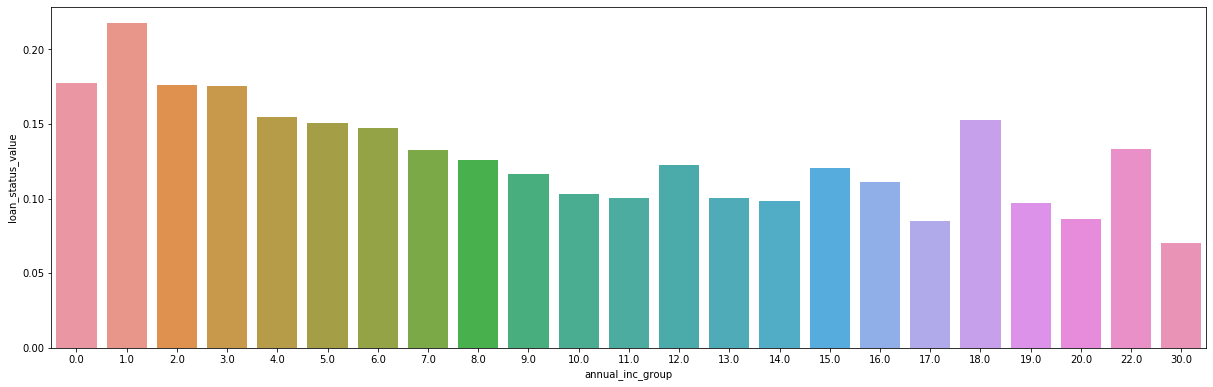

0.14739350930953532


In [39]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


l["annual_inc_group"] = l["annual_inc"]//10000
l["annual_inc_group_bins"] = l["annual_inc"]//10000*3
grouper = l.groupby("annual_inc_group").count().sort_values(by="loan_amnt", ascending=False)
considered_bins=list(grouper[grouper["loan_amnt"]>50].index)

l_cleaned = l[l["annual_inc_group"].isin(considered_bins)]
l_cleaned
gb_annual_inc_group = l_cleaned.groupby("annual_inc_group", as_index=False).mean()
sns.barplot(ax=ax,x="annual_inc_group",  y="loan_status_value",data=gb_annual_inc_group)

plt.show()



gb_annual_inc_group_range = gb_annual_inc_group["loan_status_value"].max()-gb_annual_inc_group["loan_status_value"].min()
print(gb_annual_inc_group_range)

impact["gb_annual_inc_group_range"] = gb_annual_inc_group_range




__As the annual income increases, rate of default is observed to be decreasing, steadily until the annual income is <= 200000__

In [40]:
l["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Analysis with respect to addr_state
__One state NE is shown to have significant spike in default rate__


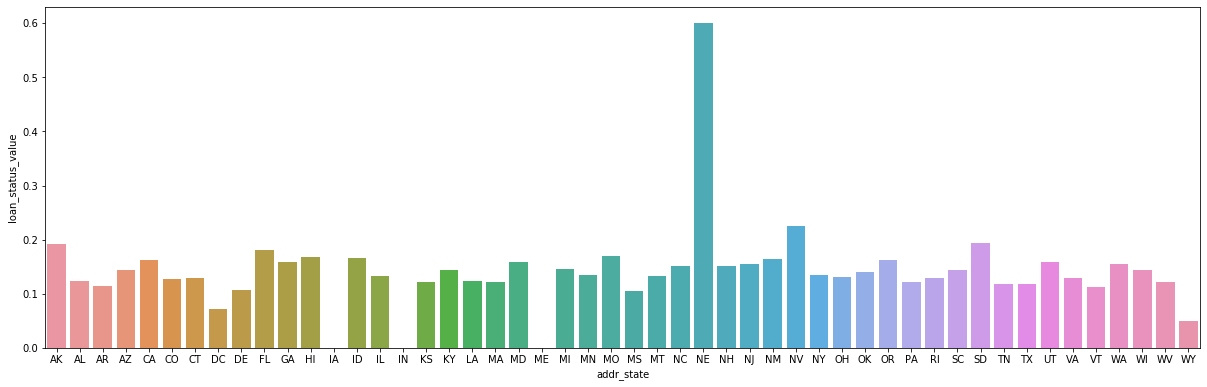

In [41]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

gb_addr_state = l.groupby("addr_state", as_index=False).mean()
sns.barplot(ax=ax,x="addr_state",  y="loan_status_value",data=gb_addr_state)
plt.show()

In [42]:
l["earliest_cr_line"]



0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 38577, dtype: datetime64[ns]


### Analysis with respect to earliest_cr_line

### Derived metric - days_since_earliest_cr_line

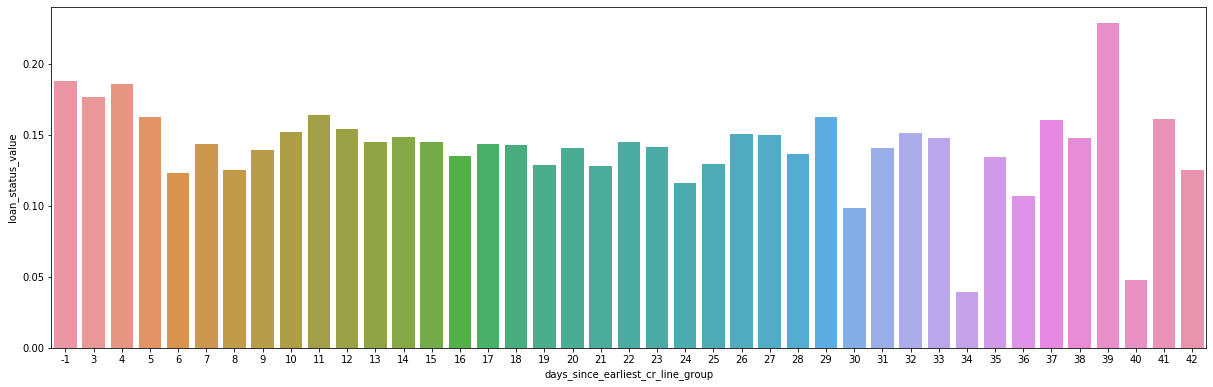

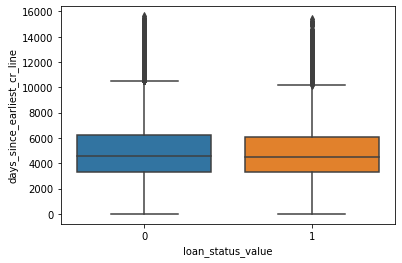

In [43]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


l["days_since_earliest_cr_line"]=(l["issue_d"]-l["earliest_cr_line"]).apply(lambda delta: delta.days if delta.days>0 else -1)
l["days_since_earliest_cr_line_group"]= l["days_since_earliest_cr_line"]//365
gb_days_since_earliest_cr_line_group = l.groupby("days_since_earliest_cr_line_group", as_index=False).mean()
sns.barplot(ax=ax,x="days_since_earliest_cr_line_group",  y="loan_status_value",data=gb_days_since_earliest_cr_line_group)
plt.show()
sns.boxplot( x="loan_status_value", y="days_since_earliest_cr_line", data=l)
plt.show()

__No significant trend is observed with the earliest_credit_line.__<br/>
__From the box plot, the time since earliest credit line was opened seems to show slightly lesser value in case of default, but the difference is not significant.__

### Analysis with respect to zip_code - Not necessary
__Since the zip code is not completely available, it doesnot make sense to consider the same for analysis.<br/> Plotting the bar plot shows spikes in 2 codes, but since the entire zipcode is unavaiable, the information provided to us is insufficient to draw any conclusion.__



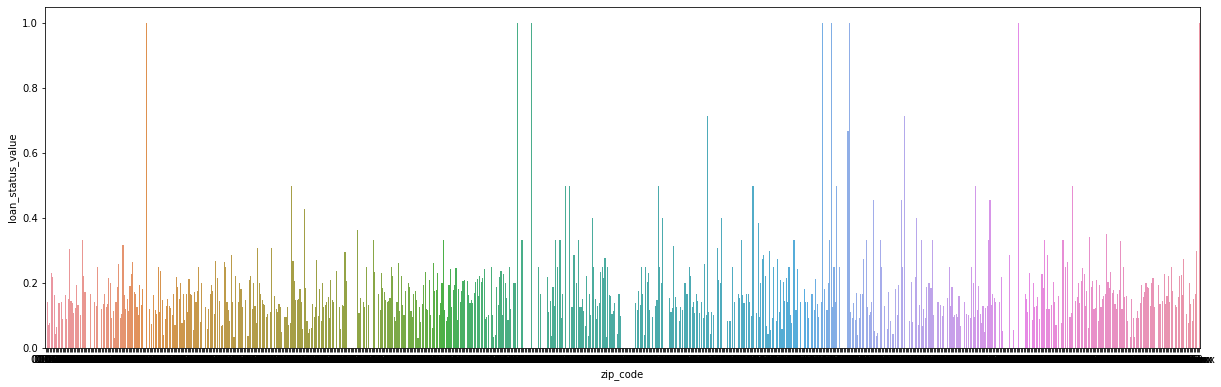

In [44]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
gb_zip = l.groupby("zip_code", as_index=False).mean()
sns.barplot(ax=ax,x="zip_code",  y="loan_status_value",data=gb_zip)
plt.show()


### Analysis with respect to total_acc

##### binning - each bin is an interval variable of 5 accounts in number, i.e, for bin n, the range would be [n*5,n*5+4]

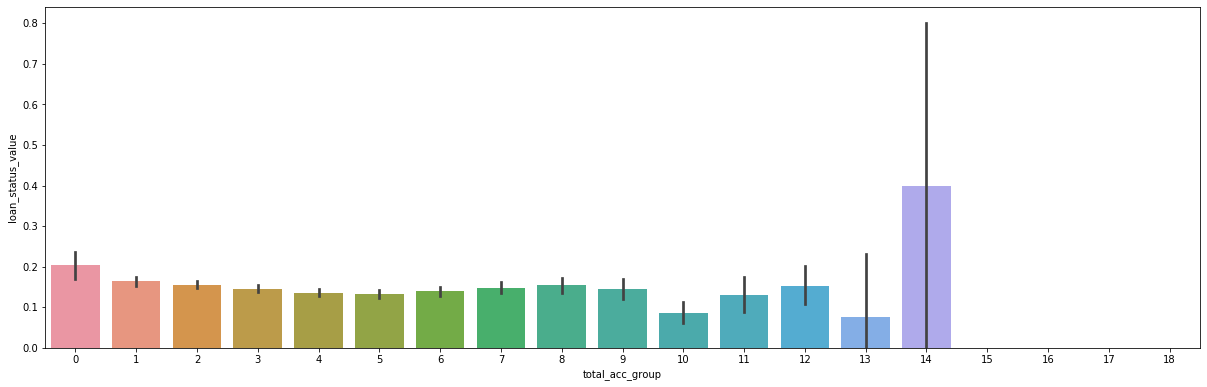

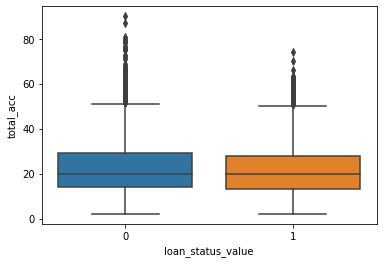

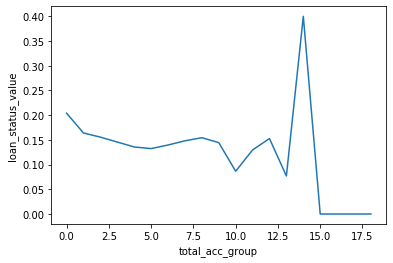

In [45]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


l["total_acc_group"] = l["total_acc"]//5
gb_total_acc_group = l.groupby("total_acc_group", as_index=False).mean()
sns.barplot(x="total_acc_group", y="loan_status_value", data=l)
plt.show()

sns.boxplot( x="loan_status_value", y="total_acc", data=l)

plt.show()

sns.lineplot( y="loan_status_value", x="total_acc_group", data=gb_total_acc_group)

plt.show()




__From box plot, for default cases, the number of total_acc seems lesser wrt 2,3,4th quartiles but the difference is not much. From the line plot, the correlation between default rate and increase in number of total_acc is insignificant. <br/>__


### Analysis with respect to pub_rec_bankruptcies

__Positive correlation is observed__

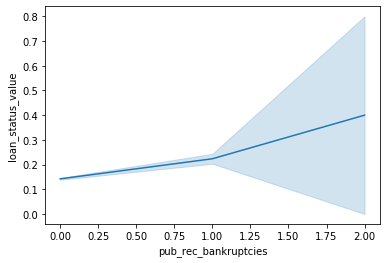

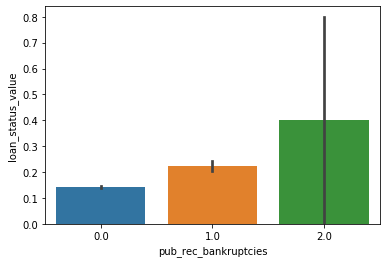

0.2576147285772303


In [46]:
#pub rec bankruptcies
sns.lineplot(x="pub_rec_bankruptcies", y="loan_status_value", data=l)
plt.show()

##pub rec bankruptcies bar plot
sns.barplot(x="pub_rec_bankruptcies", y="loan_status_value", data=l)
plt.show()


gb_pub_rec_bankruptcies =  l.groupby("pub_rec_bankruptcies").mean()


gb_pub_rec_bankruptcies_range = gb_pub_rec_bankruptcies["loan_status_value"].max()-gb_pub_rec_bankruptcies["loan_status_value"].min()
print(gb_pub_rec_bankruptcies_range)
impact["gb_pub_rec_bankruptcies_range"] = gb_pub_rec_bankruptcies_range




### Analysis with respect to pub_rec

__Public derogatory records currently dont show any impact__

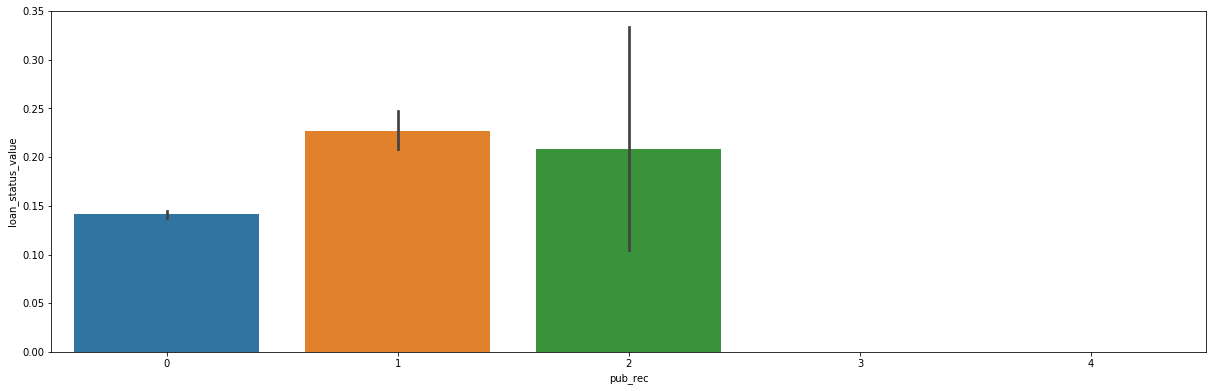

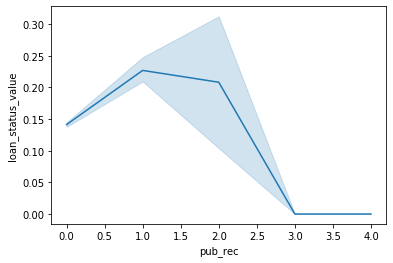

In [47]:

 
#public rec bar plot

from matplotlib import pyplot
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

#public recoed
gb_pub_rec = l.groupby("pub_rec", as_index=False).mean()
sns.barplot(x="pub_rec", y="loan_status_value", data=l)
plt.show()
#pub rec line plot
sns.lineplot(x="pub_rec", y="loan_status_value", data=l)
plt.show()



### Analysis with respect to open_acc

__Open account doesnot show any direct impact until 30 accounts. Not considering entries beyond 30 as we dont have enough sampe size to figure out default rate.__

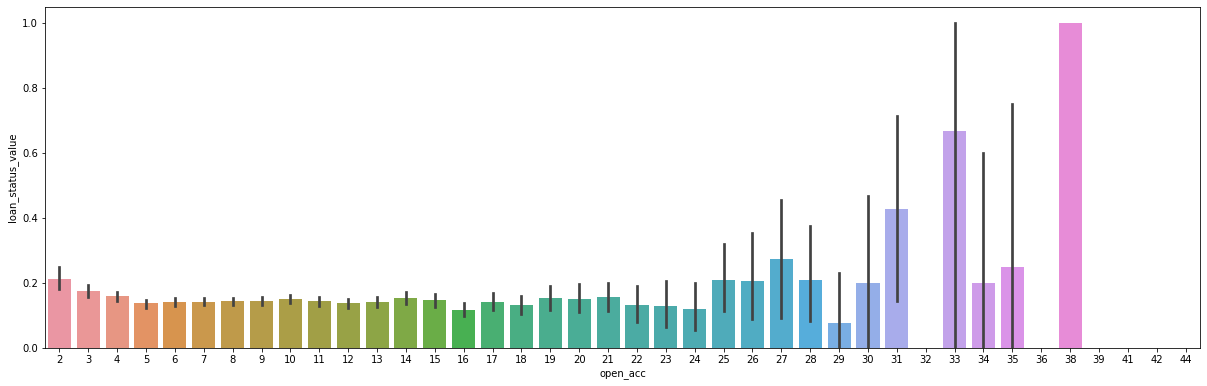

In [48]:


from matplotlib import pyplot
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

#open acc
gb_open_acc = l.groupby("open_acc", as_index=False).count()
sns.barplot(x="open_acc", y="loan_status_value", data=l)
plt.show()




### Analysis with respect to inq_last_6mths
__The lineplot shows there is positive corelation - as the default rate increased along with increase in inq_last_6mths__

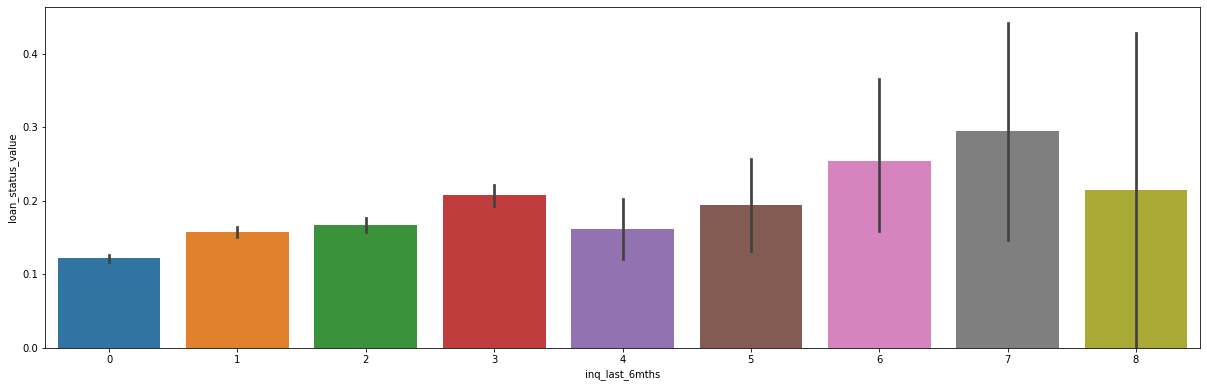

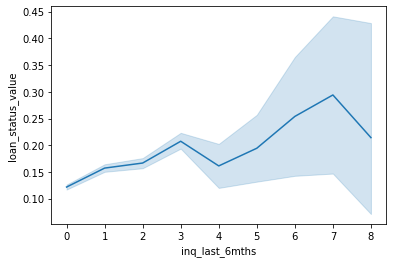

0.17225116568622212


In [49]:
#inquiry since last 6 mths
from matplotlib import pyplot
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

#inq last 6 mths
gb_inc_last_6mnths = l.groupby("inq_last_6mths", as_index=False).mean()
sns.barplot(x="inq_last_6mths", y="loan_status_value", data=l)
plt.show()
#income last 6 months
sns.lineplot(x="inq_last_6mths", y="loan_status_value", data=l)
plt.show()


gb_inc_last_6mnths_range = gb_inc_last_6mnths["loan_status_value"].max()-gb_inc_last_6mnths["loan_status_value"].min()
print(gb_inc_last_6mnths_range)
impact["gb_inc_last_6mnths_range"] = gb_inc_last_6mnths_range





### Analysis with respect to open_acc and total_acc
__increase in open_to_total_acc is observed to be a weak driver of default rate__

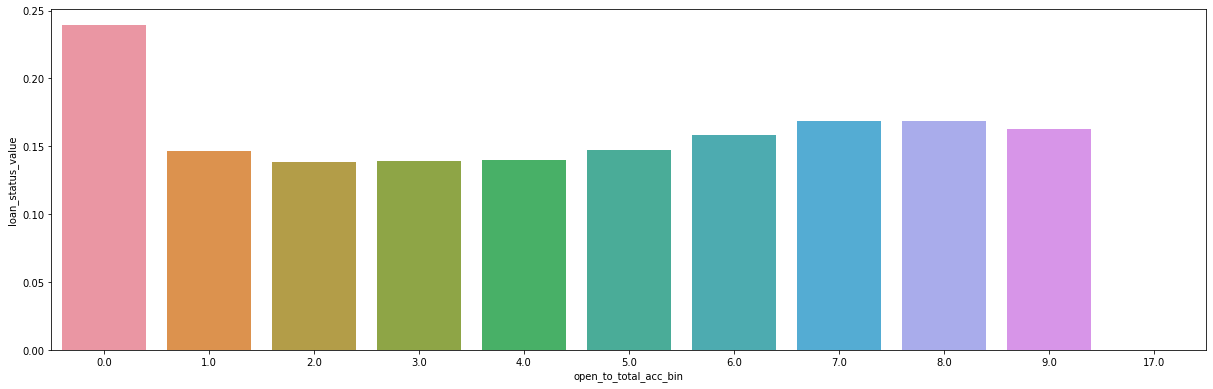

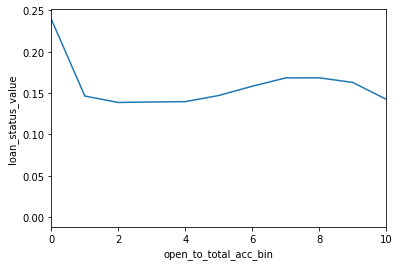

0.029833983833224054


In [50]:
a4_dims = (20.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
l["open_to_total_acc"] = l["open_acc"]/l["total_acc"]
l["open_to_total_acc_bin"]=l["open_to_total_acc"]//0.1
gb_open_to_total_acc_bin = l.groupby("open_to_total_acc_bin", as_index=False).mean()

sns.barplot(ax=ax, x="open_to_total_acc_bin", y="loan_status_value", data=gb_open_to_total_acc_bin)
plt.show()

sns.lineplot(x="open_to_total_acc_bin", y="loan_status_value", data=gb_open_to_total_acc_bin)
plt.xlim(0,10)
plt.show()

# Since first and last entries are outliers, we consier bins from 1 through 9
gb_open_to_total_acc_bin_cleaned = gb_open_to_total_acc_bin.iloc[1:-1]
gb_open_to_total_acc_bin_range = gb_open_to_total_acc_bin_cleaned["loan_status_value"].max()-gb_open_to_total_acc_bin_cleaned["loan_status_value"].min()
print(gb_open_to_total_acc_bin_range)
impact["gb_open_to_total_acc_bin_range"] = gb_open_to_total_acc_bin_range




In [51]:
l["open_to_total_acc"].describe()

count    38577.000000
mean         0.470873
std          0.186648
min          0.051282
25%          0.333333
50%          0.444444
75%          0.583333
max          1.750000
Name: open_to_total_acc, dtype: float64

### Analysis with respect to dti
__We have binned the dti ratio in intervals of 0.1 range and plotted the bar graph to observe <u>positive<u/> correlation with default rate__

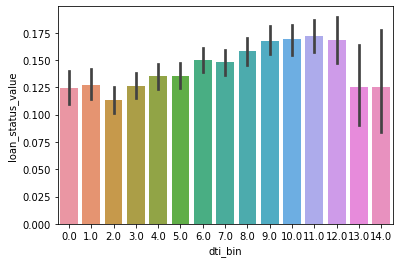

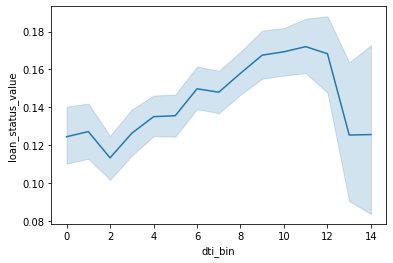

0.05863625349811613


In [52]:

#dti
l['dti_bin']=l['dti']//2
gb_dti_group = l.groupby("dti_bin", as_index=False).mean()

sns.barplot(x="dti_bin", y="loan_status_value", data=l)
plt.show()
sns.lineplot(x="dti_bin", y="loan_status_value", data=l)
plt.show()

gb_dti_group_range = gb_dti_group["loan_status_value"].max()-gb_dti_group["loan_status_value"].min()
print(gb_dti_group_range)
impact["gb_dti_group_range"] = gb_dti_group_range





#### dti is one of the drivers

<b>
<h1>
<font color = purple>
Derived metrics
</font>    
</h1>    
</b>  
<br/>


    

#### Type metric: All binned variables
#### Business metric: Time since earliest credit line
#### Data driven metric: open_to_total_acc 



<b>
<h1>
<font color = purple>
BIVARIATE AND MULTI VARIATE ANALYSIS
</font>    
</h1>    
</b>  


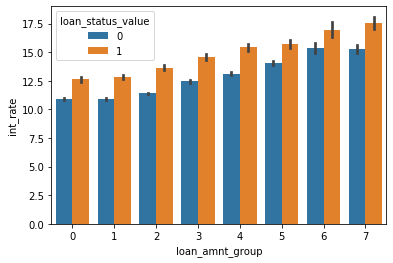

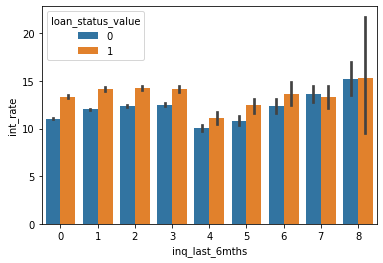

In [53]:
#scatter plot for bivariate analysis loan_amt vs int_rate
ax = sns.barplot(x="loan_amnt_group", y="int_rate",hue="loan_status_value", data=l)
plt.show()
#scatter plot for bivariate analysis inq last 6 mths vs int_rate inq_last_6mths vs int_rate
ax = sns.barplot(x="inq_last_6mths", y="int_rate",hue="loan_status_value", data=l)
plt.show()


__Considering binned variables for further analysis__

In [54]:
l_clean = l.loc[:,["loan_status_value","open_to_total_acc_bin","dti_bin","total_acc_group","days_since_earliest_cr_line_group","pub_rec_bankruptcies","loan_amnt_group","funded_amnt_inv_group","installment_group","annual_inc_group","inq_last_6mths","addr_state","purpose","verification_status","home_ownership",
"emp_length","grade","int_rate","term","pub_rec","annual_inc_group_bins"]]


In [55]:

corr = l_clean.corr()
corr.style.background_gradient(cmap='coolwarm')


,loan_status_value,open_to_total_acc_bin,dti_bin,total_acc_group,days_since_earliest_cr_line_group,pub_rec_bankruptcies,loan_amnt_group,funded_amnt_inv_group,installment_group,annual_inc_group,inq_last_6mths,emp_length,int_rate,pub_rec,annual_inc_group_bins
loan_status_value,1,0.0231927,0.0453712,-0.0231632,-0.0177051,0.0469894,0.0571464,0.038742,0.0267352,-0.0407164,0.0718778,0.0233771,0.21139,0.051001,-0.0407164
open_to_total_acc_bin,0.0231927,1,-0.00357643,-0.504542,-0.314612,-0.00912104,-0.161982,-0.160987,-0.130315,-0.143508,-0.0325566,-0.197432,0.0743884,0.000941241,-0.143508
dti_bin,0.0453712,-0.00357643,1,0.22645,0.0495409,0.00771977,0.0510019,0.0714839,0.0512049,-0.120989,0.00184341,0.0457222,0.110322,-0.00490286,-0.120989
total_acc_group,-0.0231632,-0.504542,0.22645,1,0.384653,-0.00864904,0.248147,0.23659,0.216728,0.23374,0.111897,0.194228,-0.0465696,-0.0224324,0.23374
days_since_earliest_cr_line_group,-0.0177051,-0.314612,0.0495409,0.384653,1,0.055582,0.201086,0.194594,0.164135,0.182754,0.00414899,0.306302,-0.119652,0.0438053,0.182754
pub_rec_bankruptcies,0.0469894,-0.00912104,0.00771977,-0.00864904,0.055582,1,-0.0341304,-0.0340613,-0.0333068,-0.0162405,0.014821,0.0708502,0.0840158,0.841571,-0.0162405
loan_amnt_group,0.0571464,-0.161982,0.0510019,0.248147,0.201086,-0.0341304,1,0.915825,0.878703,0.272283,0.0141931,0.128288,0.294503,-0.0492082,0.272283
funded_amnt_inv_group,0.038742,-0.160987,0.0714839,0.23659,0.194594,-0.0340613,0.915825,1,0.84789,0.248901,-0.00238042,0.142195,0.292143,-0.0491389,0.248901
installment_group,0.0267352,-0.130315,0.0512049,0.216728,0.164135,-0.0333068,0.878703,0.84789,1,0.257253,0.0133962,0.10069,0.269975,-0.0447518,0.257253
annual_inc_group,-0.0407164,-0.143508,-0.120989,0.23374,0.182754,-0.0162405,0.272283,0.248901,0.257253,1,0.0354268,0.0929008,0.0489269,-0.01813,1


In [56]:
l_clean.corr()["loan_status_value"].sort_values()

annual_inc_group_bins               -0.040716
annual_inc_group                    -0.040716
total_acc_group                     -0.023163
days_since_earliest_cr_line_group   -0.017705
open_to_total_acc_bin                0.023193
emp_length                           0.023377
installment_group                    0.026735
funded_amnt_inv_group                0.038742
dti_bin                              0.045371
pub_rec_bankruptcies                 0.046989
pub_rec                              0.051001
loan_amnt_group                      0.057146
inq_last_6mths                       0.071878
int_rate                             0.211390
loan_status_value                    1.000000
Name: loan_status_value, dtype: float64

### Since our target variable is only one, most of the bivariate or multi variate analysis we do from now, is to pull out unexpected trends, and eliminate redundant ie highly correlated drivers

## Recommendation:
__Looking into the verification status, for the observed trend of verified applications showing higher default rate, we decided to drill down with the help of other categorical variables, to find that the Grade-F,G in term-36months is a special case where the default rate has shot up__

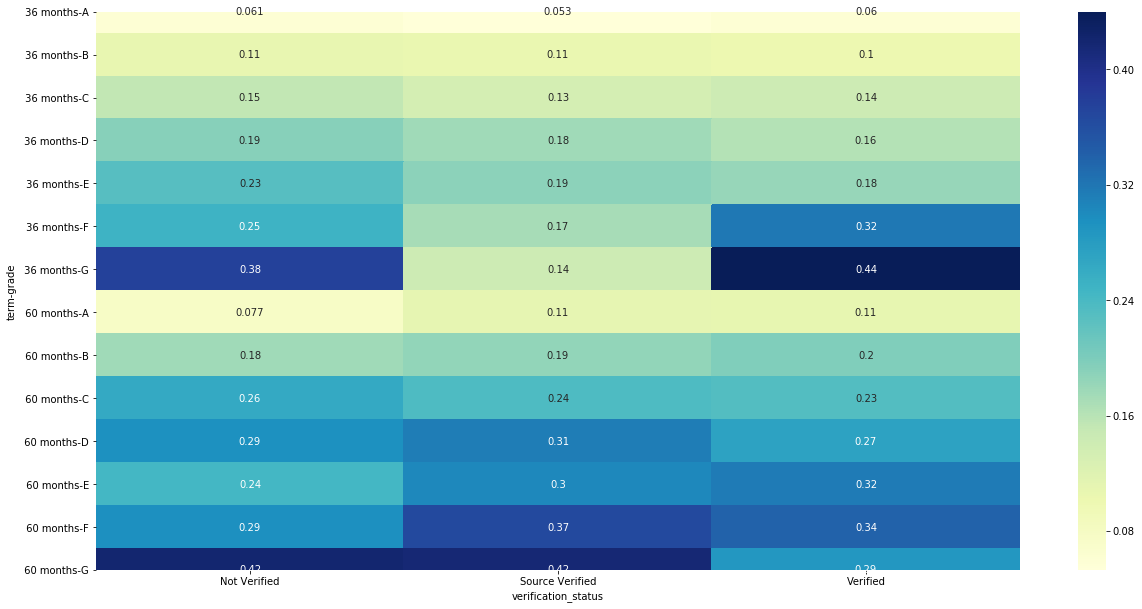

In [57]:
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=["term","grade"],columns=["verification_status"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()

<b>Bivariate analysis
    <br/>
    numerical
    categorical - wrt - target variable

In [58]:
numerical=['loan_status_value',
 'open_to_total_acc_bin',
 'dti_bin',
 'total_acc_group',
 'days_since_earliest_cr_line_group',
 'pub_rec_bankruptcies',
 'loan_amnt_group',
 'funded_amnt_inv_group',
 'installment_group',
 'annual_inc_group',
 'inq_last_6mths',
 'emp_length',
 'int_rate']
nominal = set(l_clean.columns).difference(set(numerical))

In [59]:
print(numerical)
print(nominal)

['loan_status_value', 'open_to_total_acc_bin', 'dti_bin', 'total_acc_group', 'days_since_earliest_cr_line_group', 'pub_rec_bankruptcies', 'loan_amnt_group', 'funded_amnt_inv_group', 'installment_group', 'annual_inc_group', 'inq_last_6mths', 'emp_length', 'int_rate']
{'home_ownership', 'verification_status', 'grade', 'term', 'annual_inc_group_bins', 'addr_state', 'pub_rec', 'purpose'}


## Recommendation:

__NE tends to show highest level of default rate, but since it has only 5 entries best if further insights are considered while giving loan__



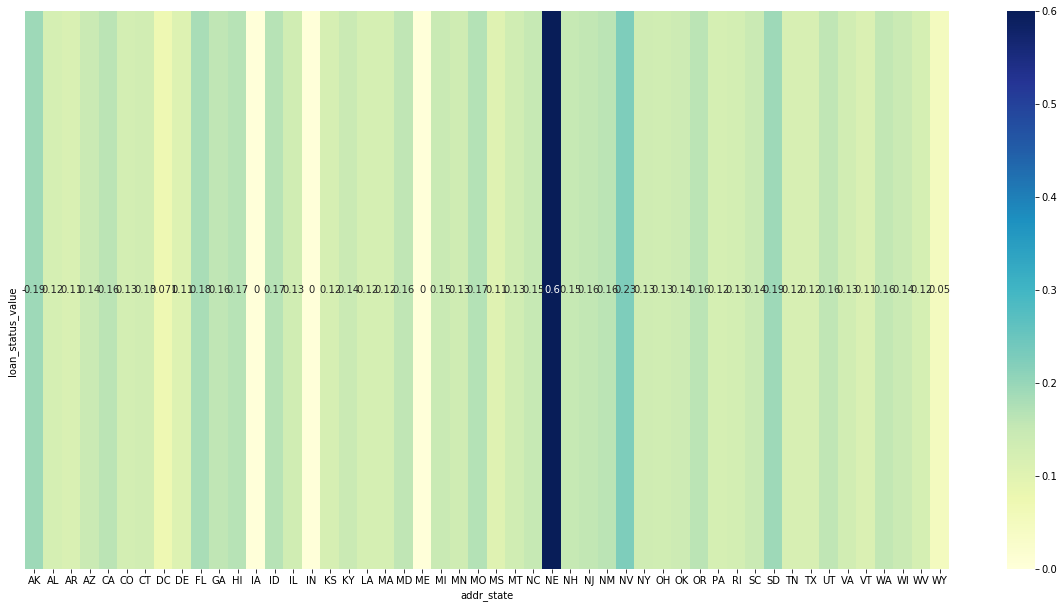

In [60]:
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value",  columns=["addr_state"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()



## Recommendation:

__pub_rec_bankruptcies, annual_inc_group are inversely related. historically, it is safe to lend loans with annual income group 79 or above__






In [61]:
l_clean.columns

Index(['loan_status_value', 'open_to_total_acc_bin', 'dti_bin',
       'total_acc_group', 'days_since_earliest_cr_line_group',
       'pub_rec_bankruptcies', 'loan_amnt_group', 'funded_amnt_inv_group',
       'installment_group', 'annual_inc_group', 'inq_last_6mths', 'addr_state',
       'purpose', 'verification_status', 'home_ownership', 'emp_length',
       'grade', 'int_rate', 'term', 'pub_rec', 'annual_inc_group_bins'],
      dtype='object')

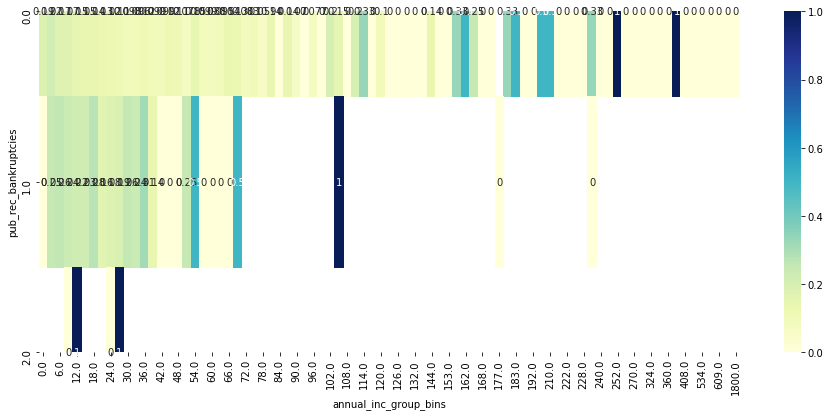

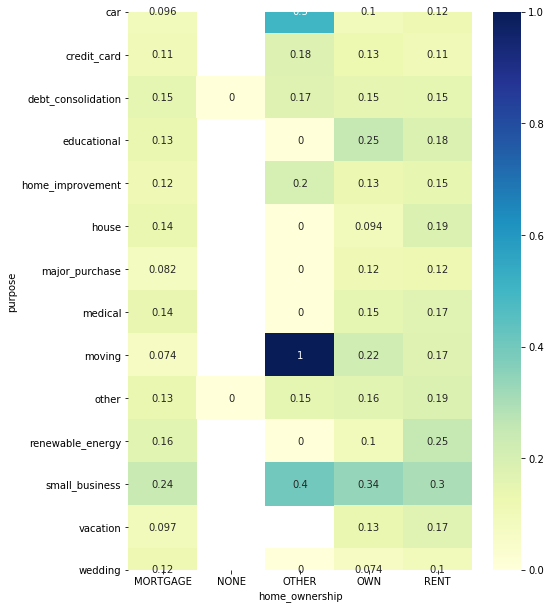

In [62]:
a4_dims = (15.7, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=["pub_rec_bankruptcies"],columns=["annual_inc_group_bins"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()
pt

a4_dims = (7.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pt=l_clean.pivot_table(values="loan_status_value",index=["purpose"],columns=["home_ownership"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()


 




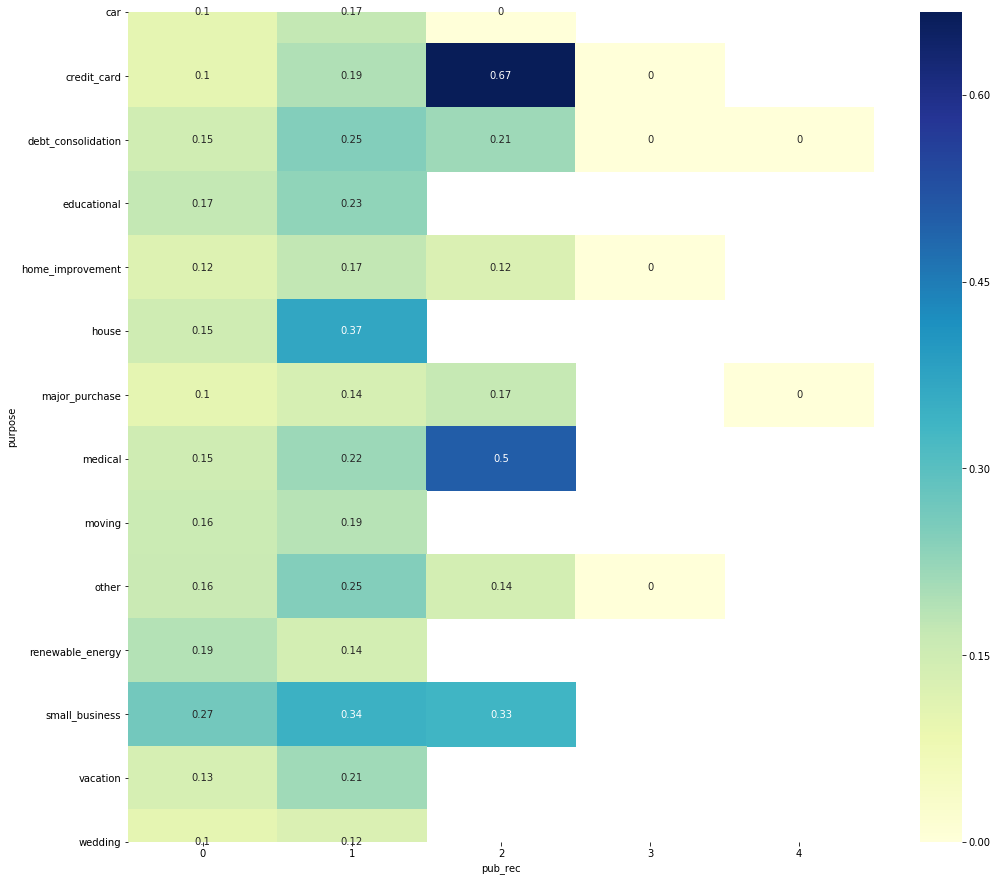

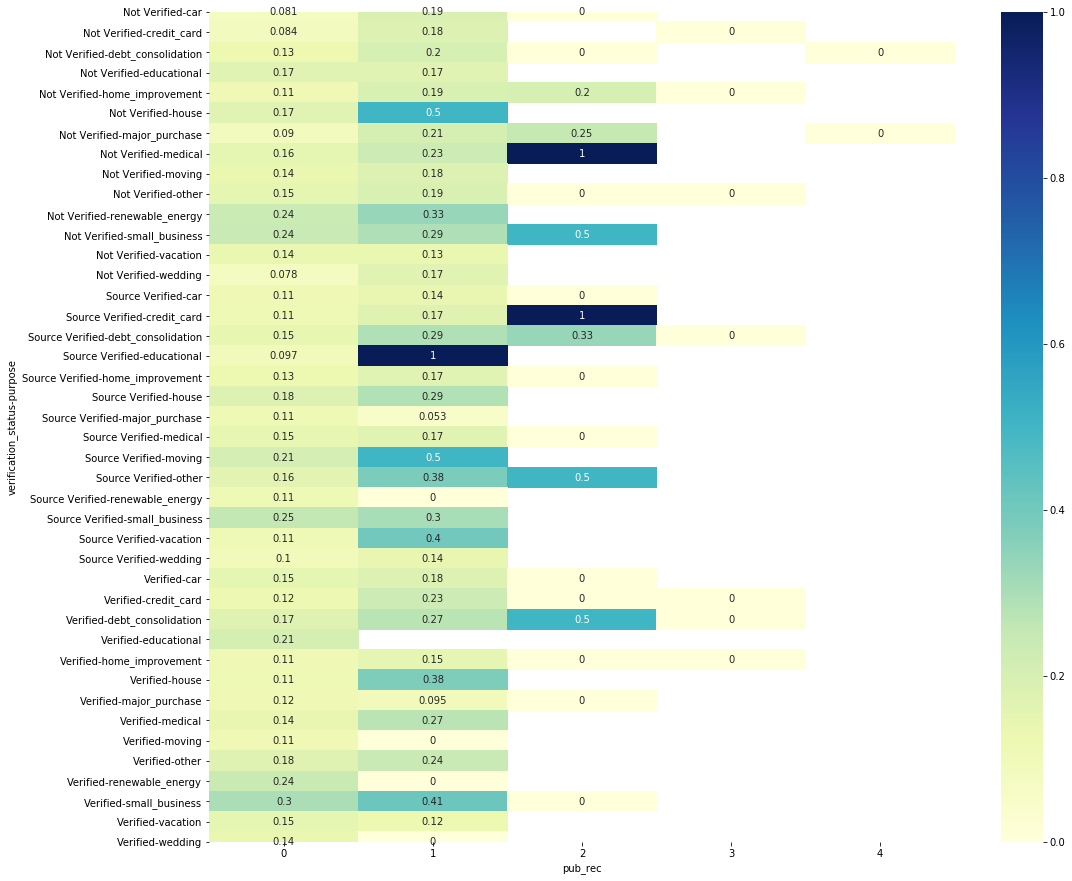

In [63]:
a4_dims = (16.7, 15.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=[ "purpose"], columns=["pub_rec"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()
a4_dims = (16.7, 15.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pt=l_clean.pivot_table(values="loan_status_value", index=["verification_status", "purpose"], columns=["pub_rec"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()


## Recommendation:
__Home ownership OTHER with 60 months shows high risk but historical data is very less in number to back the fact.
Exercise caution in this category__



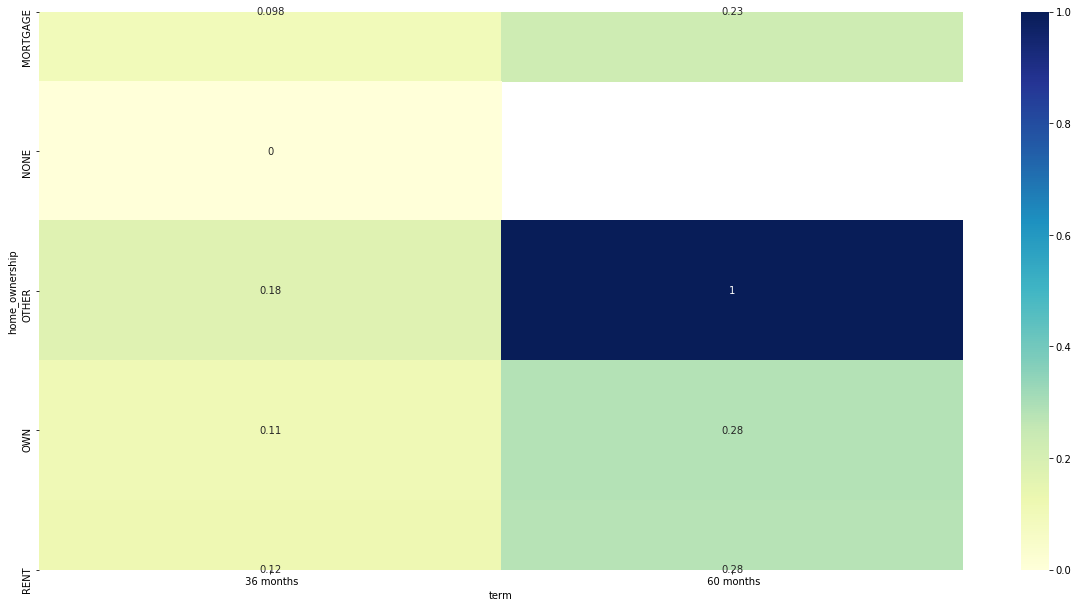

,loan_status_value,open_to_total_acc_bin,dti_bin,total_acc_group,days_since_earliest_cr_line_group,pub_rec_bankruptcies,loan_amnt_group,funded_amnt_inv_group,installment_group,annual_inc_group,inq_last_6mths,addr_state,purpose,verification_status,home_ownership,emp_length,grade,int_rate,pub_rec,annual_inc_group_bins
term,,,,,,,,,,,,,,,,,,,,
36 months,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
60 months,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [64]:

a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

pt=l_clean.pivot_table(values="loan_status_value", index=["home_ownership"],columns=["term"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True)
plt.show()

x=l_clean[l_clean["home_ownership"]=="OTHER"]
x.groupby(["term"]).count()

## Recommendation: 

### Under 36 month term: 
#### small_business is a risky investment 

### Under 60 month term:
#### education and small_business are risky investments    



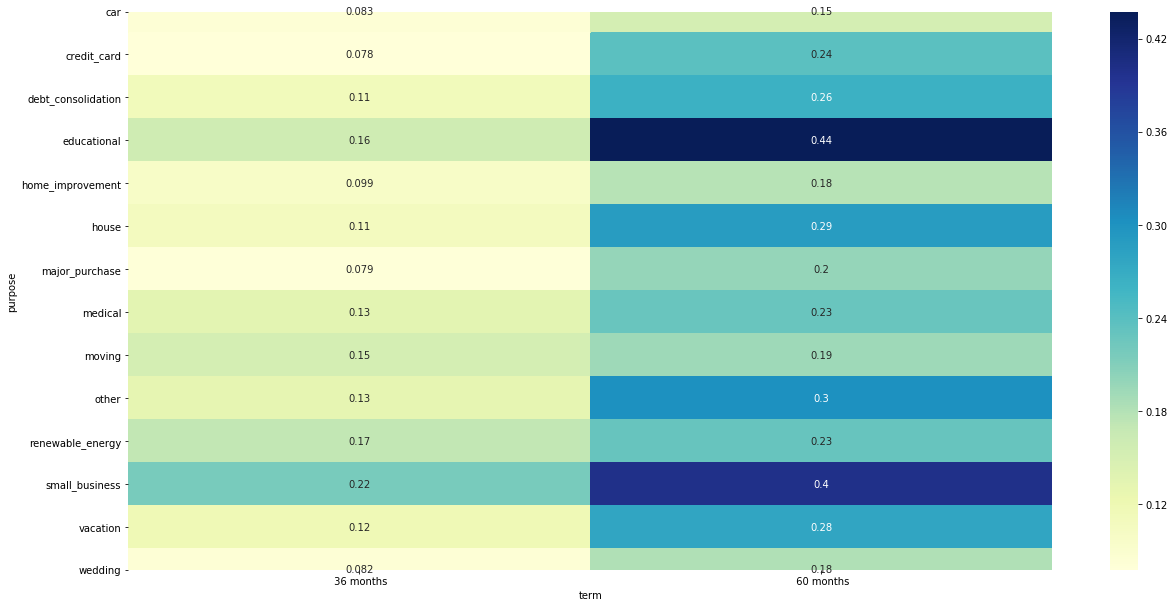

In [65]:
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

pt=l_clean.pivot_table(values="loan_status_value", index=["purpose"],columns=["term"], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True)
plt.show()

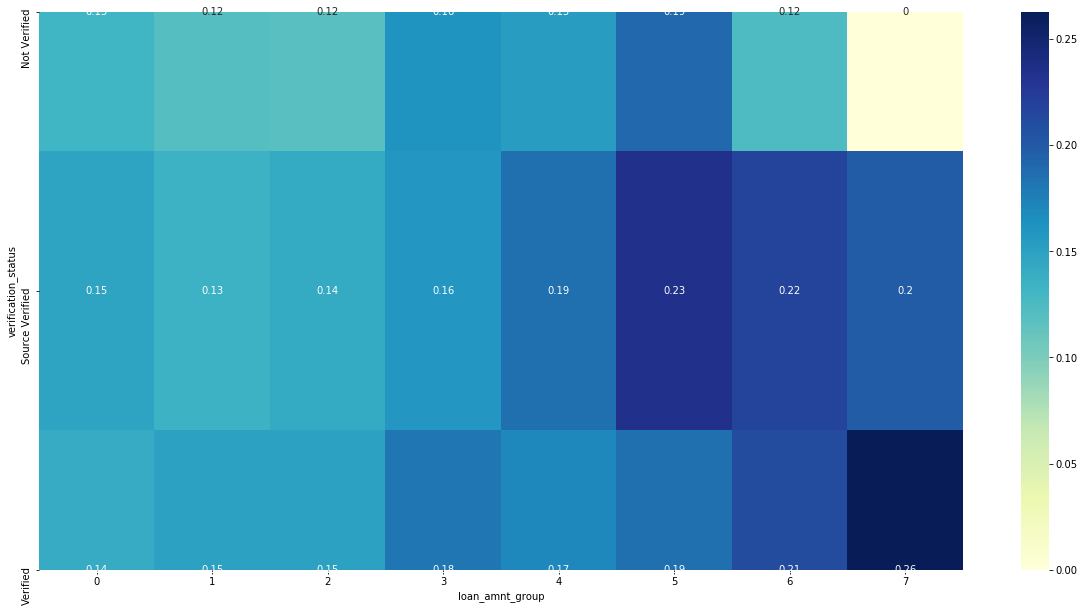

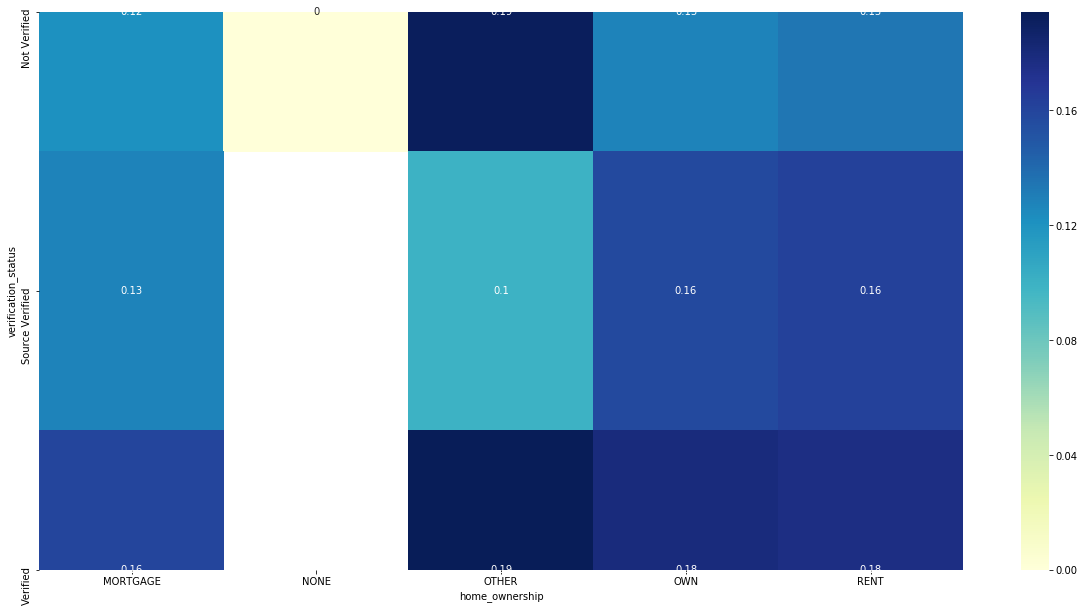

In [66]:
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=["verification_status"],columns=['loan_amnt_group'], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=["verification_status"],columns=['home_ownership'], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()

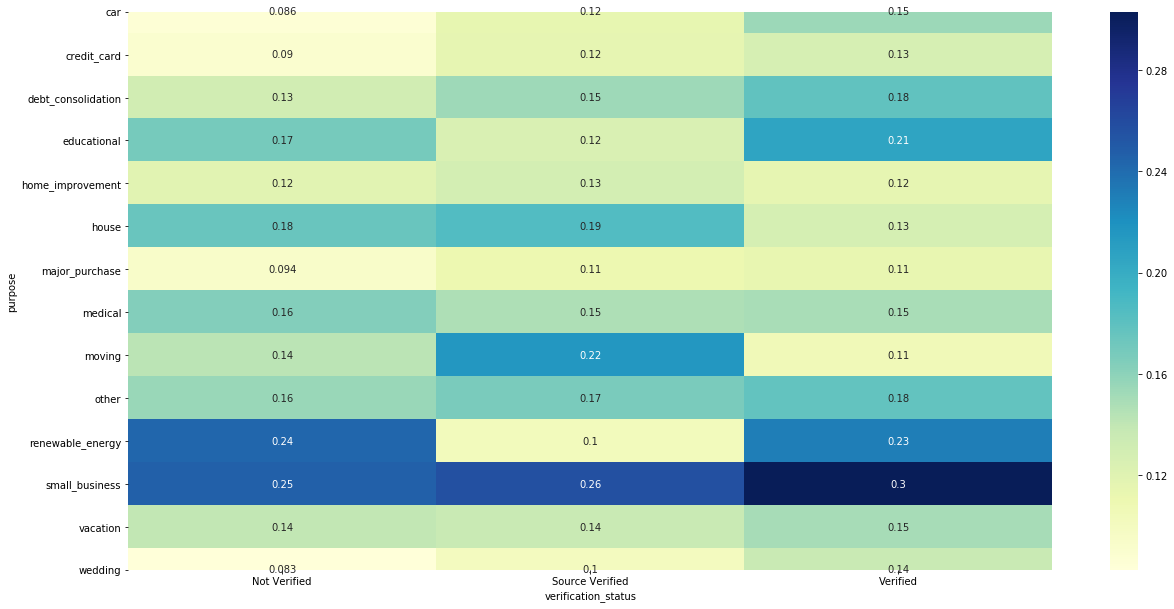

In [67]:
a4_dims = (20.7, 10.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


pt=l_clean.pivot_table(values="loan_status_value", index=["purpose"],columns=['verification_status'], aggfunc=np.mean)
sns.heatmap( pt, cmap="YlGnBu",annot=True, )
plt.show()

In [68]:
corr_observations = l_clean.corr()["loan_status_value"].sort_values()
pqr = corr_observations.apply(lambda x: "+" if x>=0 else "-")
abs_corr_observations=corr_observations.apply(lambda x: abs(x))
abs_corr_data = pd.concat([abs_corr_observations, pqr], axis=1) 


In [69]:
abs_corr_data.columns=["correlation_value", "correlation_type"]
abs_corr_data.sort_values(by="correlation_value").head(50)

,correlation_value,correlation_type
days_since_earliest_cr_line_group,0.017705,-
total_acc_group,0.023163,-
open_to_total_acc_bin,0.023193,+
emp_length,0.023377,+
installment_group,0.026735,+
funded_amnt_inv_group,0.038742,+
annual_inc_group,0.040716,-
annual_inc_group_bins,0.040716,-
dti_bin,0.045371,+
pub_rec_bankruptcies,0.046989,+


### Analysis result of segmented univariate analysis

<pre>
Top 5 drivers:
Grade
Interest rate
Term
INQ_LAST_6mths
Loan_amount_group
Public_rec_bankruptcies



Weak drivers:
dti_bin
~annual_inc_group
funded_amnt_inv_group
open_acc_to_total_acc_ratio
<pre/>


## Impact of variables in increasing order

In [70]:

{k: v for k, v in sorted(impact.items(), key=lambda item: item[1])}


{'gb_open_to_total_acc_bin_range': 0.029833983833224054,
 'gb_emp_length_range': 0.03486891602027492,
 'gb_verification_status_range': 0.039722543051679354,
 'gb_dti_group_range': 0.05863625349811613,
 'gb_installment_group_range': 0.0932226456178552,
 'gb_funded_amnt_inv_group_range': 0.11626956835756905,
 'gb_loan_amnt_group_range': 0.1192288149094603,
 'gb_term_range': 0.14222913868197734,
 'gb_annual_inc_group_range': 0.14739350930953532,
 'gb_purpose_range': 0.16755376415369522,
 'gb_inc_last_6mnths_range': 0.17225116568622212,
 'gb_home_ownership_range': 0.1836734693877551,
 'gb_pub_rec_bankruptcies_range': 0.2576147285772303,
 'gb_grade_range': 0.2778623285516181,
 'gb_sub_grade_range': 0.4515372124282285}

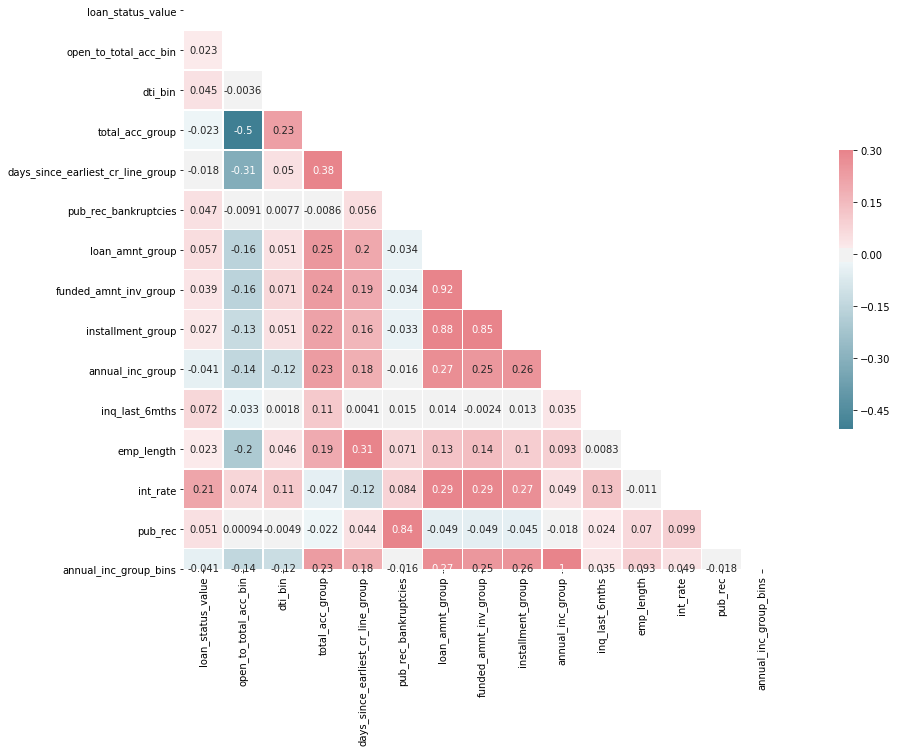

In [71]:
a4_dims = (20.7, 10.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)


corr = l_clean.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=a4_dims)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()